<center><h1>MACHINE LEARNING LAB </h1> </center>
<center><h2>BD2P3</h2> </center>
<center><h3>Roll No: 21BDA11</h3> </center>
<center><h3>23rd April 2022</h3></center>

<i>Machine Learning:</i><br>
    Model train a machine to do the tasks that a human would do otherwise<br>
    Create a mathematical or a statistical model<br>
    <br>
<i>Features:</i><br>
The things that distinguish one object from the other. Features are a.k.a 'variables'.

<i>Types of ML:</i><br>
<ul>
    <li>Supervised Learning</li>
    - When there is a target variable. When there is a labelled data set, each row has a label.<br>
    - Regression and classification are used here. <br>
    - Regression is for continous target variables and use<br>
    - Classification is for discrete target variable.<br>
    <li>Unsupervised Learning</li>
    - There is no target variable. The machine finds patterns within the data. <br>

<b><h3> I. EXPLORATORY DATA ANALYSIS</h3></b>

EDA is a part of ML modelling exercise. <br>
Important because it gives insights; it is the most powerful way.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pp
sns.set(style="darkgrid")

In [2]:
tips=sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
126,8.52,1.48,Male,No,Thur,Lunch,2
113,23.95,2.55,Male,No,Sun,Dinner,2
127,14.52,2.00,Female,No,Thur,Lunch,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
55,19.49,3.51,Male,No,Sun,Dinner,2


In [5]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [6]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [9]:
tips.describe()
#Works only on numeric variables 

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
tips.corr
#Linear relationships between variables 
#All the numeric variables 

<bound method DataFrame.corr of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

<b><h2>Data Visualization - Seaborn</h2></b>

<b><i> a) relplot</i></b><br>
relplot is short for Relational Plot.

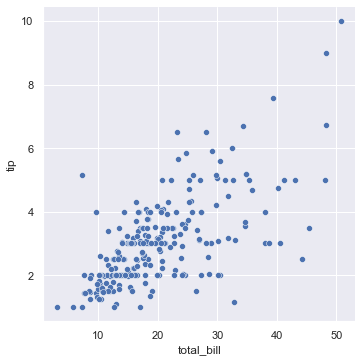

In [12]:
#Relational Plot
sns.relplot(x="total_bill",y="tip",data=tips)
#As bill amount increases, tip increases. 

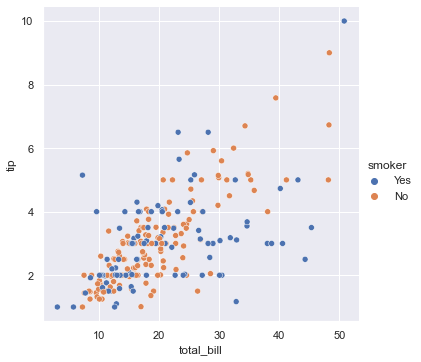

In [13]:
sns.relplot(x="total_bill",y="tip",hue="smoker",data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

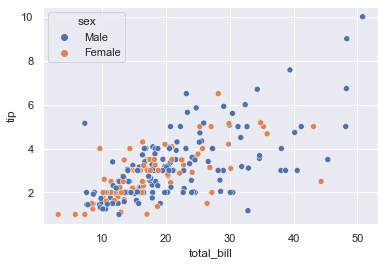

In [14]:
#Scatter Plot
sns.scatterplot(x="total_bill",y="tip",hue="sex",data=tips)
#males have a higher bill value 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

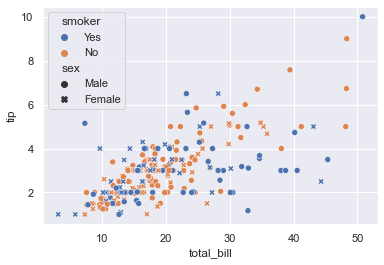

In [15]:
sns.scatterplot(x="total_bill",y="tip",hue="smoker",style="sex",data=tips)

In [16]:
tips.groupby('time')['total_bill'].mean()
#Dinners are costlier than lunches

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [17]:
tips.groupby('sex')['total_bill'].mean()
#Males' total bill amount is more. 
#Used for confirmation of the plots

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

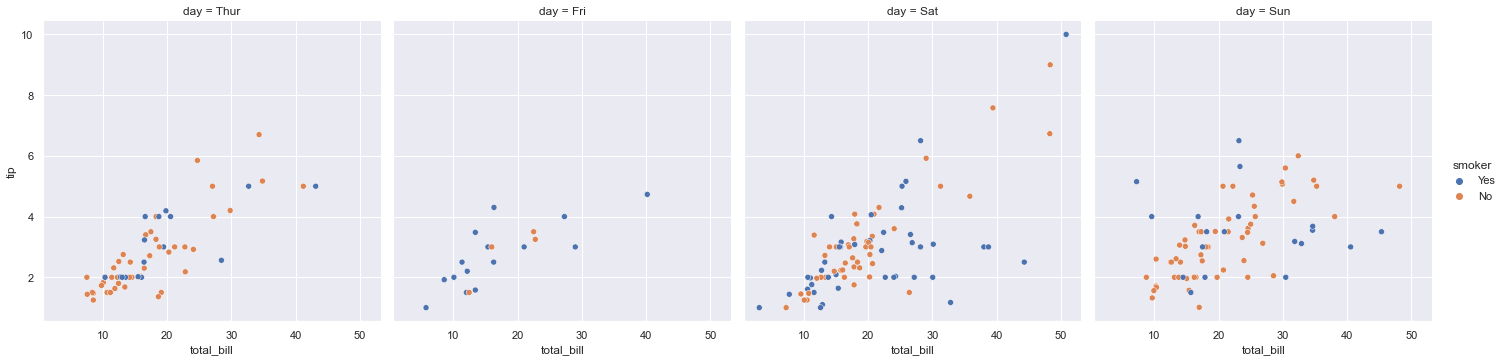

In [18]:
sns.relplot(x="total_bill",y="tip",hue="smoker",col="day",data=tips)
#color of the plots represent smoker and non-smoker

<b><i> b) catplot </i></b><br>
Short for Categorical Plot. 

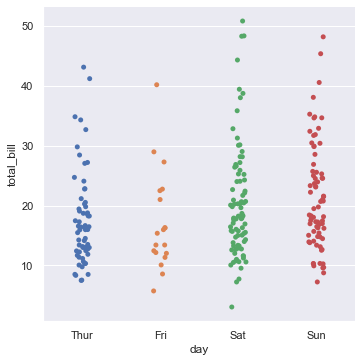

In [19]:
sns.catplot(x="day",y="total_bill",data=tips)
#How popular is the restaurant on each day
#Friday is the least popular

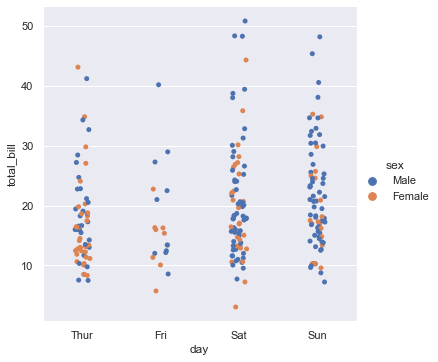

In [20]:
sns.catplot(x="day",y="total_bill",hue="sex",data=tips)
#More males on saturdays and sundays

<b><i> c) swarmplot </i></b><br>
Draws a categorical scatterplot with no overlapping points.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

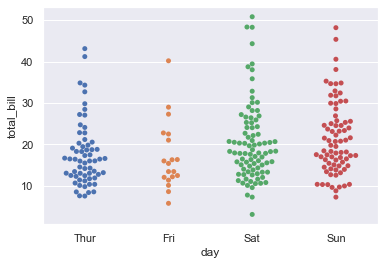

In [21]:
sns.swarmplot(x="day",y="total_bill",data=tips)
#swarmplot does not overlap

<AxesSubplot:xlabel='day', ylabel='total_bill'>

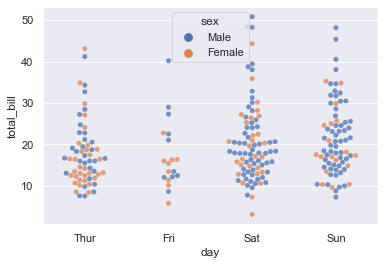

In [22]:
sns.swarmplot(x="day",y="total_bill",hue="sex",alpha=.75,data=tips)

In [23]:
tips.groupby(['day','sex'])['total_bill'].count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: total_bill, dtype: int64

C:\Users\Jerusha Gomez\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='size', ylabel='total_bill'>

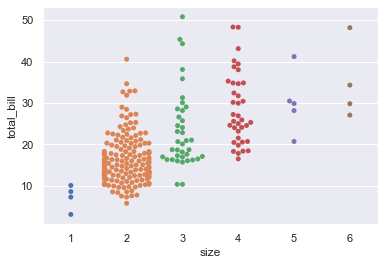

In [24]:
sns.swarmplot(x="size",y="total_bill",data=tips)

In [25]:
#people go to dinner on sat n sun
#people go to lunch on thursday 

C:\Users\Jerusha Gomez\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='size', ylabel='total_bill'>

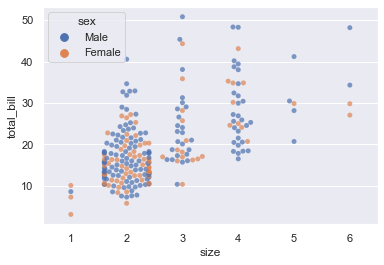

In [26]:
sns.swarmplot(x="size",y="total_bill",hue="sex",alpha = 0.7,data=tips)
#Both men and women are concentrated in size 2 

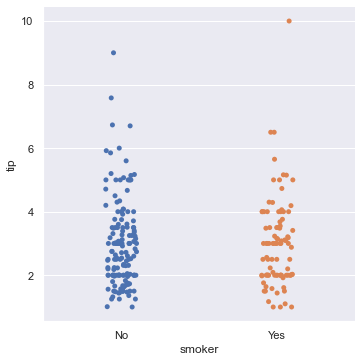

In [27]:
sns.catplot(x="smoker",y="tip",order=["No","Yes"],data=tips)
#Both smokers and non-smokers almost give the same amount of tips

In [28]:
tips.groupby('smoker')['tip'].mean()
#This is to prove the conclusion from the above graph
#The mean tips of both smokers and non-smokers are almost the same

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

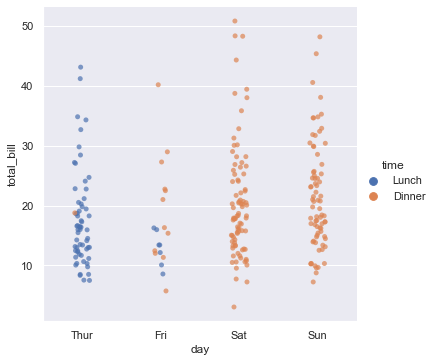

In [29]:
sns.catplot(x="day",y="total_bill",hue="time",alpha=0.7,data=tips)
#On Thursdays, lunches are predominant
#Fridays see a combination of lunch and dinner
#On Saturdays and Sundays, dinners are predominant, and generate higher bills

In [30]:
tips.groupby(['day','time'])['total_bill'].count()
#Again, to see numbers that prove the above graph

day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Lunch      0
      Dinner    87
Sun   Lunch      0
      Dinner    76
Name: total_bill, dtype: int64

<AxesSubplot:xlabel='day', ylabel='total_bill'>

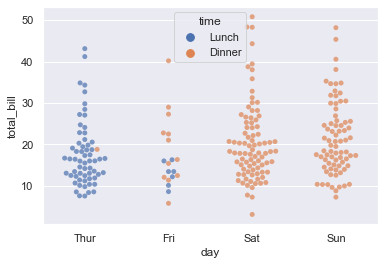

In [31]:
sns.swarmplot(x="day",y="total_bill",hue="time",alpha=0.7,data=tips)
#Due to the inherent property of swarmplots, we see non-overlapping points

<b><i> d) Boxplot </i></b><br>
Draws a boxplot to show the distributions with respect to categories. <br>
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. <br>
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

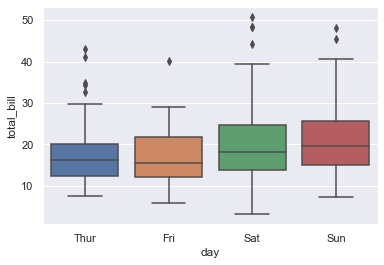

In [32]:
sns.boxplot(x="day",y="total_bill",data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

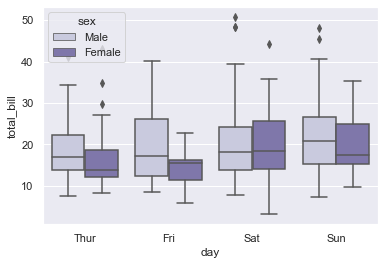

In [33]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=tips,palette="Purples")
#On all days, men seem to be generating a higher bill value
#On Saturdays and Sundays,total bill generated is almost the same for both men and women

<AxesSubplot:xlabel='day', ylabel='total_bill'>

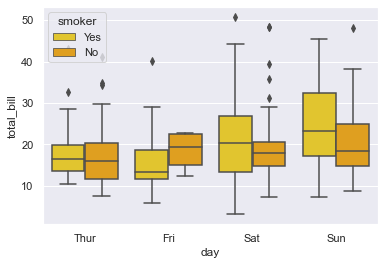

In [34]:
sns.boxplot(x="day",y="total_bill",hue="smoker",data=tips,palette="Wistia")
#non-smokers have lower value by days

In [35]:
#creating a variable called weekend so as to analyse saturdays and sundays together
tips["weekend"] = tips["day"].isin(["Sat","Sun"])
#returns a boolean value : is it a Saturday/Sunday or not?

In [36]:
tips.sample(6)
#Returns the given number of rows in random

,total_bill,tip,sex,smoker,day,time,size,weekend
74,14.73,2.20,Female,No,Sat,Dinner,2,True
229,22.12,2.88,Female,Yes,Sat,Dinner,2,True
184,40.55,3.00,Male,Yes,Sun,Dinner,2,True
218,7.74,1.44,Male,Yes,Sat,Dinner,2,True
114,25.71,4.00,Female,No,Sun,Dinner,3,True
215,12.90,1.10,Female,Yes,Sat,Dinner,2,True


<AxesSubplot:xlabel='day', ylabel='total_bill'>

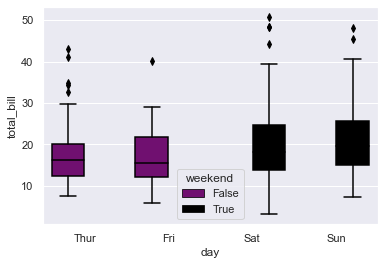

In [37]:
#to use multiple colors, store the colors in a list. Pass the list to palette.
my_color=["purple","black"]
sns.boxplot(x="day",y="total_bill",hue="weekend",data=tips,palette=my_color)

<b><i> e) Boxen Plot </i></b><br>
The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.<br>
By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.<br>
Easier to spot outliers.

<AxesSubplot:xlabel='sex', ylabel='tip'>

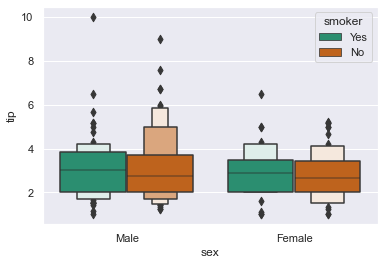

In [38]:
sns.boxenplot(x="sex",y="tip",hue="smoker",data=tips,palette="Dark2")
#In both cases, the smokers seem to be giving more tips. 

<b><i> f) Violin Plot (Fancy Box Plot)</i></b><br>
Similar in functionality of the box plot. <br>
however, unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

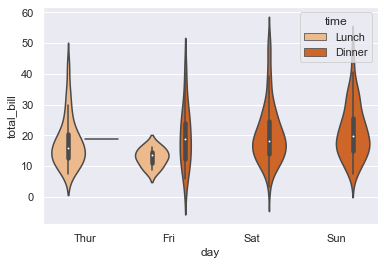

In [39]:
sns.violinplot(x="day", y="total_bill",hue="time",data=tips,palette="Oranges")
#On Fridays, the dinner bill has a larger range than the Saturdays and Sundays. 
#Sundays's bill value is higher than the other days. 

Text(0, 0.5, 'Bill Amount')

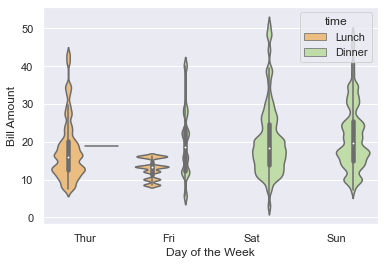

In [40]:
plot = sns.violinplot(x="day",y="total_bill",hue="time",bw=.12,data=tips,palette="Spectral")
plot.set_xlabel("Day of the Week")
plot.set_ylabel("Bill Amount")
#bw - Either the name of a reference rule or the scale factor to use when computing the kernel bandwidth.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

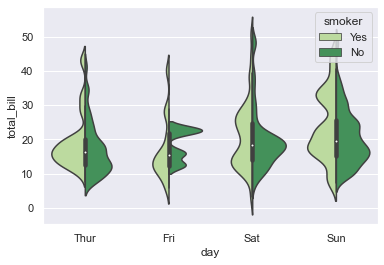

In [41]:
sns.violinplot(x="day",y="total_bill",hue="smoker",bw=.25,split=True,data=tips,palette="YlGn")
#Since the non-smoker side is wider, there is a higher probability that non-smokers generate larger bills. 
#split when set to True draws half of the violin for each level.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

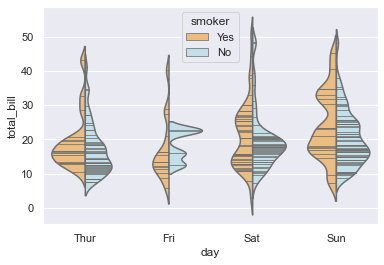

In [42]:
sns.violinplot(x="day",y="total_bill",hue="smoker",bw=.25,split=True,palette="RdYlBu",inner="stick",data=tips)
#inner - Representation of the datapoints in the violin interior.({“box”, “quartile”, “point”, “stick”, None})

<AxesSubplot:xlabel='day', ylabel='total_bill'>

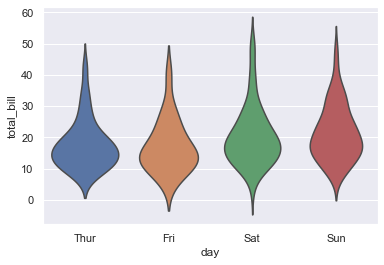

In [43]:
sns.violinplot(x="day",y="total_bill",inner=None,data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

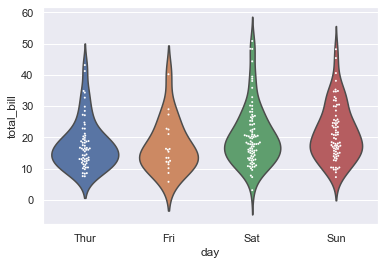

In [44]:
#Overlapping of two kinds of plots
sns.violinplot(x="day",y="total_bill",inner=None,data=tips)
sns.swarmplot(x="day",y="total_bill",color="white",size=2,data=tips)

<b><i> g) Bar Plot</i></b><br>
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. 

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

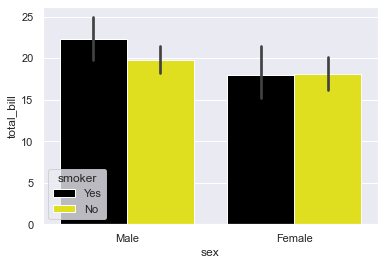

In [45]:
sns.barplot(x="sex",y="total_bill",hue="smoker",data=tips,palette=["black","yellow"])
#Males in general generate higher bill amounts.
#The male smokers generate a higher bill amount. 

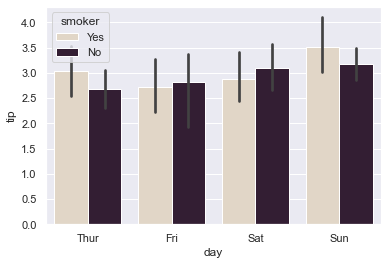

In [46]:
sns.barplot(x="day",y="tip",hue="smoker",palette="ch:.25",data=tips);

<b><i> h) Count Plot</i></b><br>
The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.<br>
It uses the concept of a bar chart for the visual depiction

<AxesSubplot:xlabel='day', ylabel='count'>

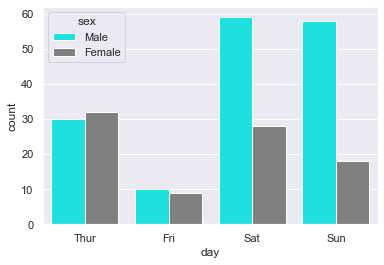

In [47]:
sns.countplot(x="day",hue="sex",data=tips,palette=["cyan","gray"])
#Only on Thursdays, the number of females is greater than the number of men. 
#On every other day, the number of men is greater than the number of women, specially on Saturdays and Sundays.

<AxesSubplot:xlabel='sex', ylabel='count'>

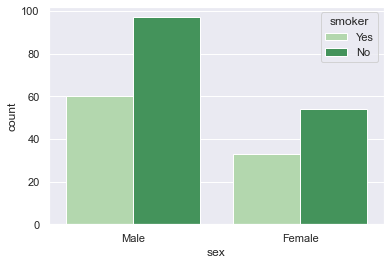

In [48]:
sns.countplot(x="sex",hue="smoker",palette="Greens",data=tips)
#Number of non-smokers is greater than number of smokers in both males and females. 

<AxesSubplot:xlabel='day', ylabel='count'>

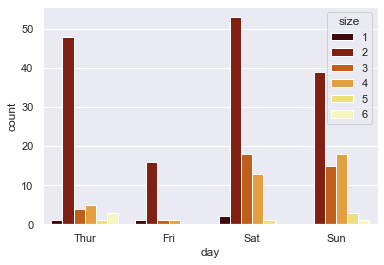

In [49]:
sns.countplot(x="day",hue="size",palette="afmhot",data=tips)

<b><i> i) Point Plot</i></b><br>
The point plot in seaborn means a scatter plot depicting point estimations for categories with defined confidence intervals.<br>
The point plot also draws error lines (also called as bars or glyphs) that are extended from the points to desrcibe the dispersion or uncertainty of the point estimate.

<AxesSubplot:xlabel='day', ylabel='tip'>

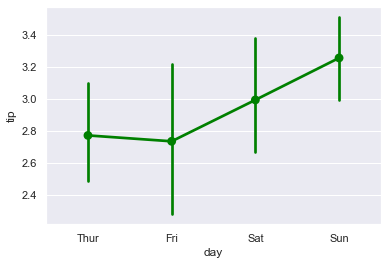

In [50]:
sns.pointplot(x="day",y="tip",data=tips,color="green")

<AxesSubplot:xlabel='day', ylabel='size'>

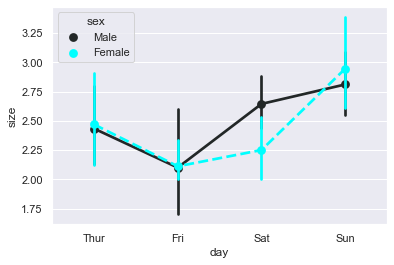

In [51]:
sns.pointplot(x="day",y="size",hue="sex",linestyles=["-", "--"],data=tips,color="cyan")

<AxesSubplot:xlabel='day', ylabel='count'>

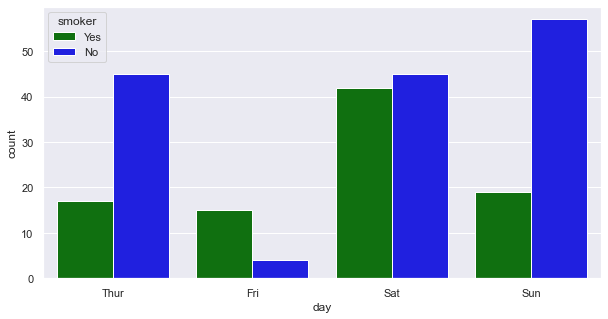

In [52]:
f,ax=pp.subplots(figsize=(10,5))
#Pyplot function to display graphs in grids
sns.countplot(x="day",hue="smoker",data=tips,palette=["green","blue"])

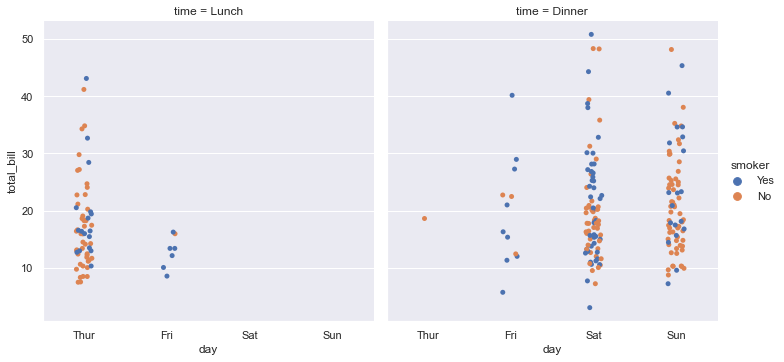

In [53]:
sns.catplot(x="day",y="total_bill",hue="smoker",col="time",data=tips)
#col - categorical data that will determine the faceting of the grid.

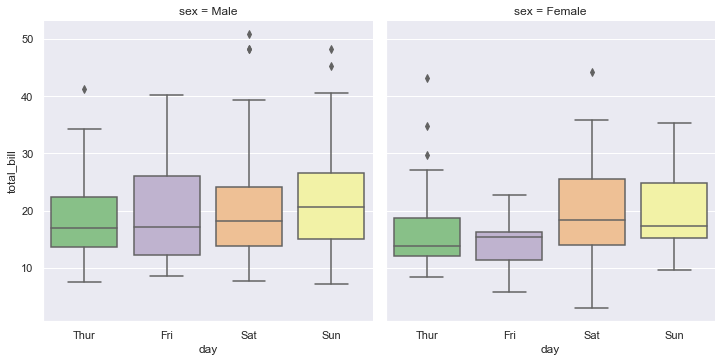

In [54]:
sns.catplot(x="day",y="total_bill",col="sex",kind="box",data=tips,palette="Accent")

https://www.kaggle.com/code/murats/visualization-with-seaborn-on-tips-dataset-part1/notebook <br>
https://seaborn.pydata.org/tutorial.html

<b><i>Automated EDA</i></b>
Sweetviz is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA with just two lines of code.

In [55]:
!pip install sweetviz

In [56]:
import sweetviz as sv

In [64]:
my_report = sv.analyze(tips)
#analyze is a function in sweetviz that takes the dataframe to be analysed. 
#Apart from the dataframe, it can take other parameters too. 
my_report.show_html()
#show_html(...) will create and save an HTML report at the given file path.

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


file:///C:/Users/Jerusha%20Gomez/DG%20-%20SJC/SEMESTER%202/Machine%20Learning/SWEETVIZ_REPORT.html

In [58]:
#Machine Learning Tom Mitchell